# HR-Employee-Attrition

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
df= pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Let's check the features present in our data and then we will look at their data types.

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

It can be observe that Attrition is the target variable.Let's look at the shape of the dataset.

In [4]:
df.ndim

2

In [5]:
df.shape

(1470, 35)

We have 34 independent variables and 1 target variable. We will predict the AveragePrice with the help of model built using the train data.
Next, let's look at how many categorical and numerical variables are there in our dataset. We will look at their data types.

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

We can see there are two format of data types:
1. int64: It represents the integer variables. Integer variables in our dataset are: Age, DailyRate, DistanceFromHome, Education, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager. 
2. object: It represents the categorical variables. Categorical variables in our dataset are: Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime.    

In [7]:
# We will look for any missing values in the dataset.
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in the dataset.

In [8]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [9]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [10]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [11]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [12]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [13]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [14]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

# Univariate Analysis

Now Let's look at the distribution of our target variable. Let us look at its frequency table.

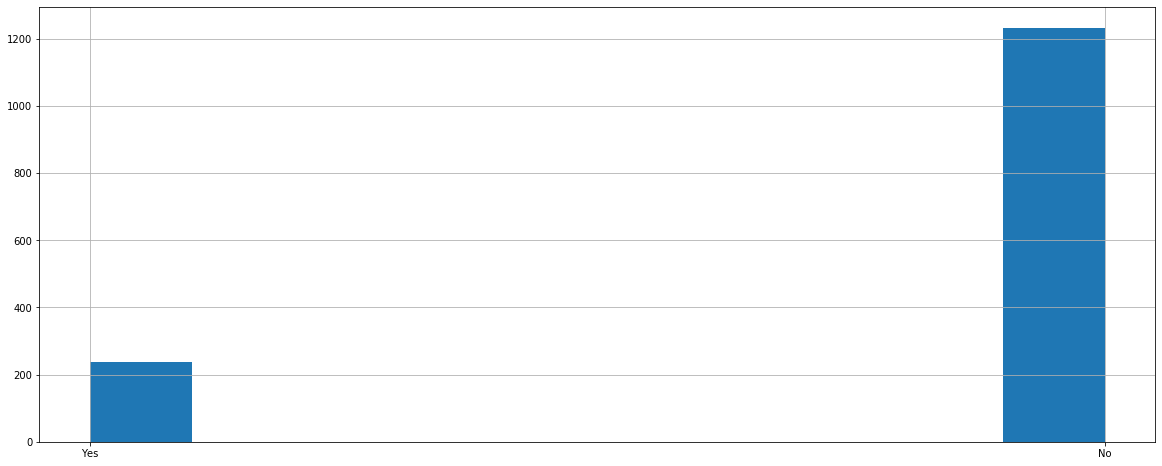

In [15]:
df['Attrition'].hist(figsize=[20,8])

From above we have observed the number of particular range of Attrition. As from above we can analysis that in our data Yes data in attrition is 201 to 210 times. As like this we can also observe the aother value counts also.

# Bivariate Analysis

<BarContainer object of 1470 artists>

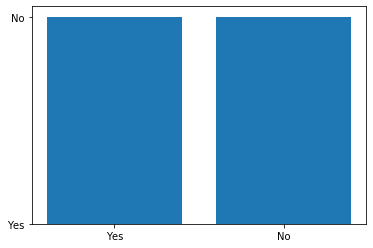

In [16]:
plt.bar(df['Attrition'],df['OverTime'])

From above we can observe the relation between Attrition vs OverTime.

<BarContainer object of 1470 artists>

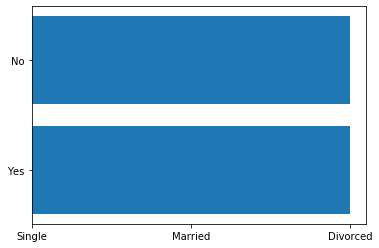

In [17]:
plt.barh(df['Attrition'],df['MaritalStatus'])

From above we can observe the relation between Attrition vs MaritalStatus.

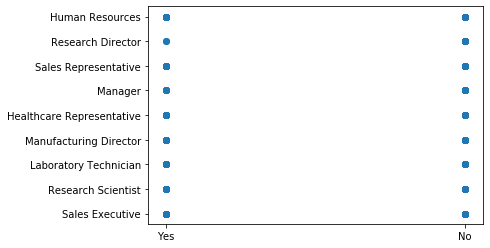

In [18]:
plt.scatter(df['Attrition'],df['JobRole'])

From above we can observe the relation between Attrition vs JobRole.

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

In [21]:
df['Attrition']=le.fit_transform(df['Attrition'])

In [22]:
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])

In [23]:
df['Department']=le.fit_transform(df['Department'])

In [24]:
df['EducationField']=le.fit_transform(df['EducationField'])

In [25]:
df['Gender']=le.fit_transform(df['Gender'])

In [26]:
df['JobRole']=le.fit_transform(df['JobRole'])

In [27]:
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])

In [28]:
df['Over18']=le.fit_transform(df['Over18'])

In [29]:
df['OverTime']=le.fit_transform(df['OverTime'])

In [30]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [31]:
df.iloc[:,0:17].describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000


In [32]:
df.iloc[:,17::].describe()

,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1.097279,6502.931293,14313.103401,2.693197,0.0,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.730121,4707.956783,7117.786044,2.498009,0.0,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,1009.000000,2094.000000,0.000000,0.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2911.000000,8047.000000,1.000000,0.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.000000,4919.000000,14235.500000,2.000000,0.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2.000000,8379.000000,20461.500000,4.000000,0.0,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2.000000,19999.000000,26999.000000,9.000000,0.0,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [33]:
# Checking correlation
corr=df.corr()
corr['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
J

In [34]:
# Splitting of independent and target variable in x and y.
x=df.drop(['Attrition','EmployeeCount','StandardHours','Over18'], axis=1)
y=df['Attrition']

In [35]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,2,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,5,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,7,1,1,...,3,4,1,6,3,3,2,2,2,2


In [36]:
x.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [37]:
from sklearn.preprocessing import power_transform
pt=power_transform(x, method='yeo-johnson')
x=pd.DataFrame(pt, columns=x.columns)
x.skew()

C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Age                        -0.007603
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EmployeeNumber             -0.288025
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
Y

In [38]:
# Checking Outlier

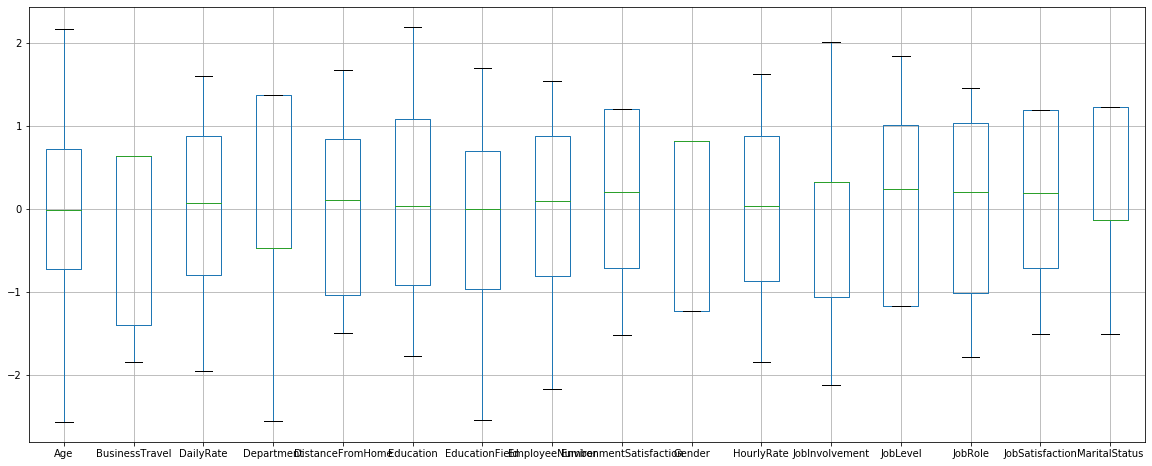

In [39]:
x.iloc[:,0:16].boxplot(figsize=[20,8])

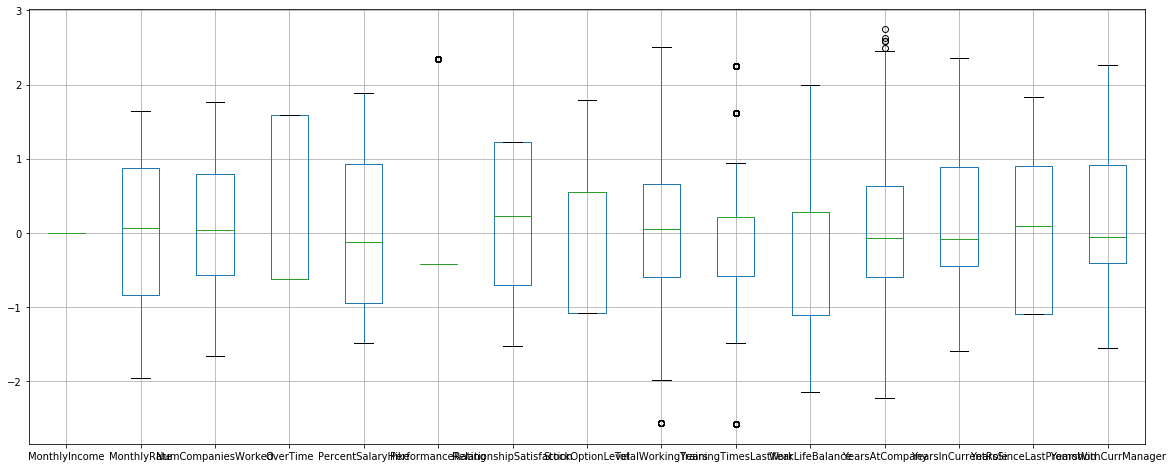

In [40]:
x.iloc[:,16::].boxplot(figsize=[20,8])

In [41]:
# Removing outlier.

In [42]:
from scipy import stats

In [43]:
df['YearsAtCompany']= stats.zscore(df['YearsAtCompany'])

In [44]:
df['TrainingTimesLastYear']= stats.zscore(df['TrainingTimesLastYear'])

In [45]:
df['PerformanceRating']= stats.zscore(df['PerformanceRating'])

In [46]:
df['TotalWorkingYears']= stats.zscore(df['TotalWorkingYears'])

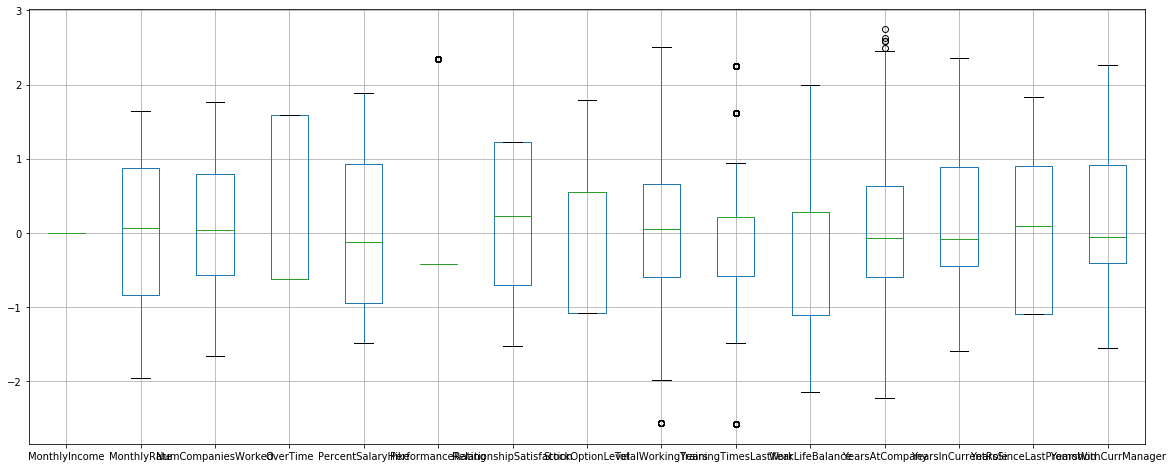

In [47]:
x.iloc[:,16::].boxplot(figsize=[20,8])

# Model Building

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Finding best random state

In [49]:
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=3, test_size=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Best accuracy is', maxAcc,'on Random_state', maxRS)

Best accuracy is 0.5 on Random_state 2
Best accuracy is 0.6666666666666666 on Random_state 3
Best accuracy is 0.75 on Random_state 4
Best accuracy is 0.8 on Random_state 5
Best accuracy is 0.8333333333333334 on Random_state 6
Best accuracy is 0.8571428571428571 on Random_state 7
Best accuracy is 0.875 on Random_state 8
Best accuracy is 0.8888888888888888 on Random_state 9
Best accuracy is 0.9 on Random_state 10
Best accuracy is 0.9090909090909091 on Random_state 11


We have found best random state value as 11. We will create our Train_test split using this random state(11).

In [50]:
# splitting into train and validation with 30% data in validation set and 70% data in train set.
x_train, x_test,y_train, y_test= train_test_split(x,y, random_state=11, test_size=0.3)

Now our data is ready. Its time to build our model and check its performance. Linear regression is used for continous problems and as it is a continous problem let's first build a Linear Regression model.

# Logistic Regression

In [51]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

0.8843537414965986
[[361  12]
 [ 39  29]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       373
           1       0.71      0.43      0.53        68

    accuracy                           0.88       441
   macro avg       0.80      0.70      0.73       441
weighted avg       0.87      0.88      0.87       441



# Decision Tree

In [52]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

0.7868480725623582
[[319  54]
 [ 40  28]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       373
           1       0.34      0.41      0.37        68

    accuracy                           0.79       441
   macro avg       0.62      0.63      0.62       441
weighted avg       0.80      0.79      0.79       441



# Support Vector Classifier

In [53]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8707482993197279
[[370   3]
 [ 54  14]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       373
           1       0.82      0.21      0.33        68

    accuracy                           0.87       441
   macro avg       0.85      0.60      0.63       441
weighted avg       0.87      0.87      0.84       441



# Random Forest Classifier

In [54]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

0.8639455782312925
[[372   1]
 [ 59   9]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       373
           1       0.90      0.13      0.23        68

    accuracy                           0.86       441
   macro avg       0.88      0.56      0.58       441
weighted avg       0.87      0.86      0.82       441



We are getting highest accuracy with LogisticRegression(88%) but it can be due to overfitting also so we will check cross validation scores.

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
scr1= cross_val_score(lr,x,y,cv=5)
print('Cross Validation Score is :', scr1.mean())

Cross Validation Score is : 0.8721088435374149


In [57]:
scr2= cross_val_score(dtc,x,y,cv=5)
print('Cross Validation Score is :', scr2.mean())

Cross Validation Score is : 0.7564625850340135


In [58]:
scr3= cross_val_score(svc,x,y,cv=5)
print('Cross Validation Score is :', scr3.mean())

Cross Validation Score is : 0.864625850340136


In [59]:
scr4= cross_val_score(rfc,x,y,cv=5)
print('Cross Validation Score is :', scr4.mean())

Cross Validation Score is : 0.8544217687074829


Minimum difference in accuracy abd cross validation scores is for RandomForestClassifier(0.01) so this is our best model.

# Hyper parameter tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
#Creating parameter list to pass in GridSearchCV
parameter={'max_depth':np.arange(2,15), 'criterion':['gini','entropy']}

In [62]:
GCV= GridSearchCV(rfc,parameter,cv=5)

In [63]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [64]:
GCV.best_params_  # Printing the best parameter found by GridSearchCV

{'criterion': 'entropy', 'max_depth': 10}

In [65]:
predgcv=GCV.best_estimator_.predict(x_test)

In [66]:
accuracy_score(y_test,predgcv)

0.8639455782312925

In [67]:
import joblib

In [68]:
joblib.dump(GCV.best_estimator_,"HR_Employee_Attrition.pk1")

['HR_Employee_Attrition.pk1']

# Conclusion 

Here we can notice that our best model is RandomForestClassifier with 87% accuracy score.
The best parameter found by GridSearchCV is 'Gini' with maximum depth 11.